<a href="https://colab.research.google.com/github/djuanthomas22/My-new-repo/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Project Overview
# This project uses a supervised regression model to predict house prices based on numerical features.
#The goal is to understand how input features relate to housing prices and evaluate model performance using Root Mean Squared Error.


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [3]:
my_house_data = pd.read_csv("/content/kc_house_data 3.csv")
# set my target feature
my_house_label = 'sqft_living'
my_house_label2 = 'price'
my_house_label3 = 'sqft_lot'
# Select a few specific colums from your DataFrame
my_house_series = my_house_data[my_house_label]
my_house_series2 = my_house_data[my_house_label2]
my_house_series3 = my_house_data[my_house_label3]

In [4]:
my_house_series

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [5]:
my_house_series2

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [6]:
my_house_series3

,sqft_lot
0,5650
1,7242
2,10000
3,5000
4,8080
...,...
21608,1131
21609,5813
21610,1350
21611,2388


In [7]:
# Drop one or more columns from your dataframe that you feel like would not be useful for the model
my_house_data = pd.read_csv("/content/kc_house_data 3.csv").drop(columns = ['date','id']).dropna()

In [8]:
x = my_house_data.drop(columns = ['price'])
y = my_house_data['price']

In [9]:
# Split data to evaluate model performance on unseen data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
# Model Selection
# A linear regression model was selected as a baseline to understand linear relationships between features and housing prices.
model = LinearRegression()

In [11]:
model.fit(x_train, y_train)

LinearRegression()

In [12]:
predicitons = model.predict(x_test)

In [13]:
predicitons

array([ 391627.32453363,  914123.93537247,  563912.00934351, ...,
        818632.96104375, 1127205.45380786,  645437.4557555 ])

In [14]:
from matplotlib import pyplot as plt

In [15]:
# df = pd.read_csv("/content/kc_house_data 3.csv").sort_values(by = 'price')
# x = df['price']
# y = df['sqft_living']

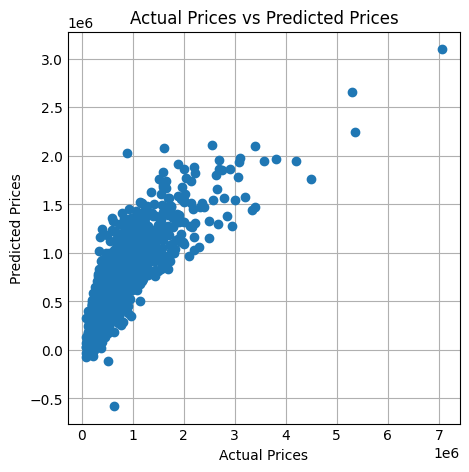

In [27]:
# Create a vizitualization of actual vs predicted prices.
plt.figure(figsize = (4,4))
plt.plot(y_test, predicitons, 'o')
plt.style.use('_mpl-gallery')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [17]:
from sklearn.metrics import root_mean_squared_error

In [18]:
# Model Evaluation
# Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE).
# The same type of error, but RMSE converts it back into the original units of the target variable.
# Lower values indicate better model performance.

root_mean_squared_error(y_test, predicitons)

221989.77759716098